In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils.utils_figures import tendency_to_col_dict

In [2]:
#metric, metricnameinunivariate = 'f1_score', 'f1_avg'
#metric, metricnameinunivariate = 'accuracy', 'accuracy_avg'
metric, metricnameinunivariate = 'balancedaccuracy', 'balancedaccuracy_avg'
#metric, metricnameinunivariate = 'mcc', 'mccscore_avg'

# import meta df
meta_df = pd.read_csv(f'meta_df_{metric}.csv', index_col=0)
meta_df = meta_df[meta_df['tendency'] != '?']

for col in meta_df.columns:
    if 'score' in col:
        meta_df[col] = meta_df[col].astype(float)
    elif 'diff' in col:
        meta_df[col] = meta_df[col].astype(float)

multivariate models performs better than univariate models
multivariate and univariate models are equivalent
univariate models performs better than multivariate models
no models performs better than the baseline


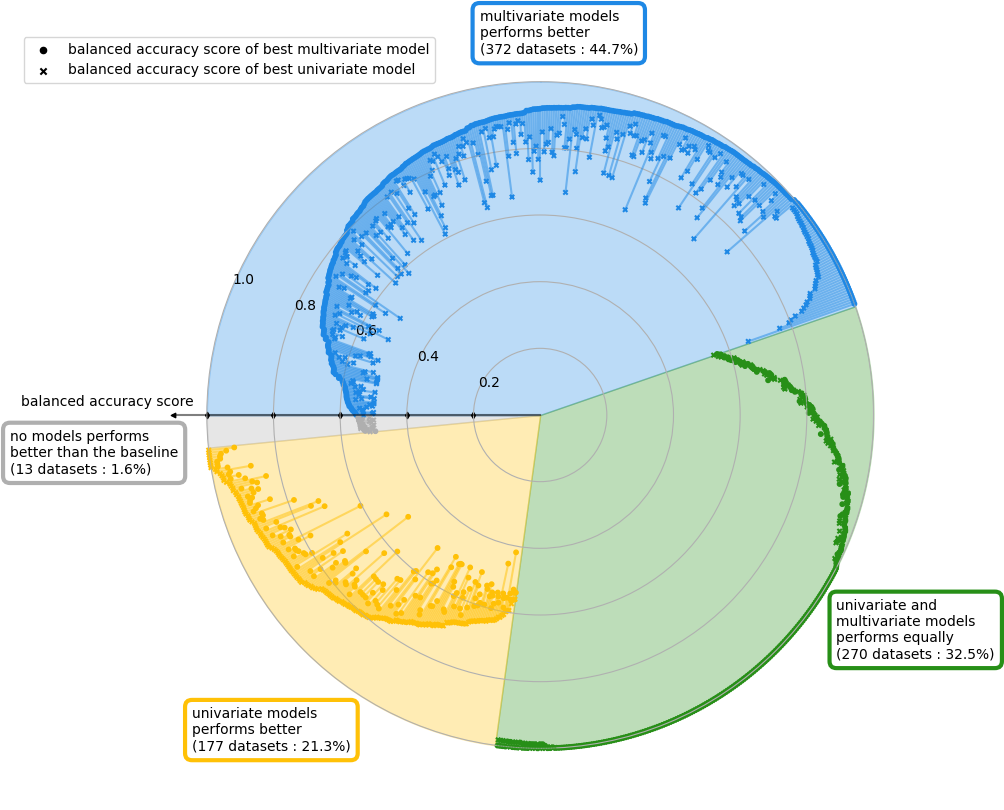

In [3]:
# sort by difference ml univariate
plot_df = meta_df.copy()
tendencies_order = list(tendency_to_col_dict.keys())
tendencies_description = ['multivariate models\nperforms better', 
                          'univariate and\nmultivariate models\nperforms equally', 
                          'univariate models\nperforms better', 
                          'no models performs\nbetter than the baseline']
plot_df['tendency'] = pd.Categorical(plot_df['tendency'], categories=tendencies_order, ordered=True)
plot_df.sort_values(['tendency', 'best method score', 'absolute difference |ML - univariate|'], inplace=True)

#plot_df = plot_df.sort_values('tendency'
plot_df['rank'] = range(len(plot_df))
plot_df['rank theta'] = [i/len(plot_df) * 2 * np.pi for i in range(len(plot_df))]
# plot the difference
fig = plt.figure(figsize=(10, 10), frameon=True)
#ax = fig.add_subplot(projection='polar', frame_on=False, theta_direction=-1, theta_offset=np.pi)
# polar subplot with no grid
ax = fig.add_subplot(111, polar=True, frame_on=False, theta_direction=-1, theta_offset=np.pi)

count_position = 0
total_count = len(plot_df)
for tendency in tendencies_order:
    count = len(plot_df[plot_df['tendency'] == tendency])
    proportion = count / len(plot_df)
    theta_start = 2*np.pi*count_position/total_count
    theta_stop = 2*np.pi*((count_position + count)/total_count)
    theta_list = np.linspace(theta_start, theta_stop, count)
    # update start_theta
    count_position += count
    ax.fill_between(theta_list, 0, 1.0, color=tendency_to_col_dict[tendency], alpha=0.3)

dots_colors = [tendency_to_col_dict[t] for t in plot_df['tendency']]
c1 = ax.scatter(plot_df['rank theta'], plot_df['best algo score'],       c=dots_colors, alpha=1.0, s=10, marker='o')
c2 = ax.scatter(plot_df['rank theta'], plot_df['best univariate score'], c=dots_colors, alpha=1.0, s=10, marker='x')
for i, row in plot_df.iterrows():
    ax.plot([row['rank theta'], row['rank theta']], [row['best univariate score'], row['best algo score']], color=tendency_to_col_dict[row['tendency']], alpha=0.5)

display_labels = []
theta_position_base = 0
theta_positions = []
for i, tendency in enumerate(tendencies_order):
    print(tendency)
    label = tendencies_description[i]
    quantity = len(plot_df[plot_df['tendency'] == tendency])
    percentage = "{0:.1%}".format(quantity / len(plot_df))
    display_labels.append('{}\n({} datasets : {})'.format(label, quantity, percentage))
    theta_position = theta_position_base + np.pi*quantity/len(plot_df)
    theta_positions.append(theta_position)
    theta_position_base += 2*np.pi*quantity/len(plot_df)
rotations = [0,0,0,0]
y_positions = [1.1, 1.15, 1.45, 1.6]
boxes_linewidth = 3

#add text in squares boxes to explain the colors
plt.text(theta_positions[0], y_positions[0], display_labels[0],
        fontsize=10, color='black', rotation=rotations[0],
        bbox=dict(facecolor='none', edgecolor=tendency_to_col_dict['multivariate models performs better than univariate models'], boxstyle='round,pad=0.5', linewidth=boxes_linewidth))
plt.text(theta_positions[1], y_positions[1], display_labels[1],
        fontsize=10, color='black', rotation=rotations[1],
        bbox=dict(facecolor='none', edgecolor=tendency_to_col_dict['multivariate and univariate models are equivalent'], boxstyle='round,pad=0.5', linewidth=boxes_linewidth))
plt.text(theta_positions[2], y_positions[2], display_labels[2],
        fontsize=10, color='black', rotation=rotations[2],
        bbox=dict(facecolor='none', edgecolor=tendency_to_col_dict['univariate models performs better than multivariate models'], boxstyle='round,pad=0.5', linewidth=boxes_linewidth))
plt.text(theta_positions[3]-0.06, y_positions[3], display_labels[3],
        fontsize=10, color='black', rotation=rotations[3],
        bbox=dict(facecolor='none', edgecolor=tendency_to_col_dict['no models performs better than the baseline'], boxstyle='round,pad=0.5', linewidth=boxes_linewidth))

display_metric_name = metric.replace('balancedaccuracy', 'balanced accuracy')
ax.plot([0, 0], [0, 1.1], color='black', alpha=0.5)
# dots every 0.2 on this line
ax.scatter([0]*5, np.arange(0.2, 1.1, 0.2), color='black', s=10, marker='d', alpha=1.0)
ax.scatter([0], [1.1], color='black', s=10, marker='<', alpha=1.0)
# text at the end of the line
ax.text(0.02, 1.3, display_metric_name + ' score', fontsize=10, color='black', rotation=0, ha='center')
# arrow at the end of the line

# add legend for the 2 markers
c1_for_legend = ax.scatter([], [], color='black', s=20, marker='o')
c2_for_legend = ax.scatter([], [], color='black', s=20, marker='x')
plt.legend(handles=[c1_for_legend, c2_for_legend], labels=[display_metric_name + ' score of best multivariate model', display_metric_name + ' score of best univariate model'], loc='upper left', bbox_to_anchor=(-0.18, 1.0))

# remove axis labels
ax.set_xticklabels([])
#ax.set_yticklabels([])
ax.set_xticks([])
#ax.set_yticks([])

# save as pdf
plt.savefig('figures/figure2_a_piechart.pdf', bbox_inches='tight')